In [7]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2
    
R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

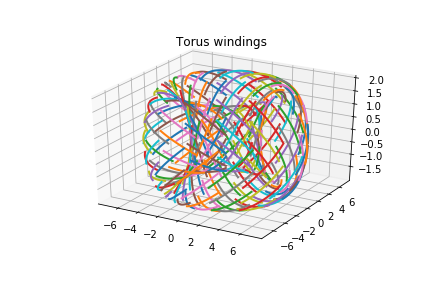

In [9]:
list_traj = []
N=15
length=25

for i in range(N):
    for j in range(N):
        list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=length-1))  

ax = plt.figure().add_subplot(projection='3d')
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Torus windings")
for i in range(len(list_traj)):
    ax.plot(*list_traj[i][:,1:].T, lw=2)
plt.show()

In [10]:
traj_list = list_traj
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(3, 9)
#print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)

project = True
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = traj_list

Trajectory shape before embedding:
(24, 4)
Trajectory shape after embedding and projecting:
(24, 4)


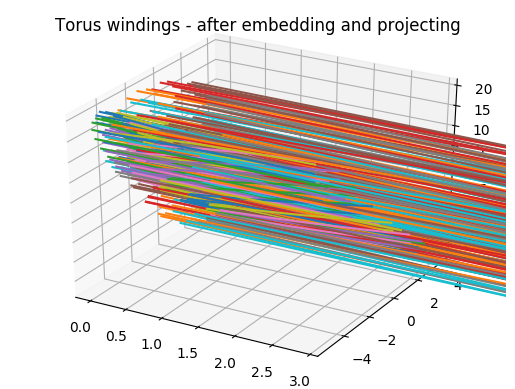

In [14]:
if project == True:
    ax = plt.figure().add_subplot(projection='3d')

    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()

In [11]:
t2s = Traj2Sim()

load=True

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_projected_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_projected_hd.npy')

|███████████████▋                        | ▃▅▇ 9835/25200 [39%] in 6:37 (24.8/s, eta: 10:20 ▅▃▁ 38/25200 [0%] in 2s (24.5/s, eta: 17:12)        (24.0/s, eta: 17:19)     (24.0/s, eta: 17:27)     ▆█▆ 122/25200 [0%] in 5s (23.6/s, eta: 17:44)    in 6s (23.6/s, eta: 17:43)   136/25200 [1%] in 6s (23.3/s, eta: 17:50)    ▆▄▂ 141/25200 [1%] in 6s (23.4/s, eta: 17:51)     in 19s (24.2/s, eta: 17:04)    in 22s (24.0/s, eta: 17:07)      693/25200 [3%] in 28s (24.7/s, eta: 16:32)    780/25200 [3%] in 32s (24.7/s, eta: 16:27)  in 44s (24.6/s, eta: 16:20) (24.6/s, eta: 16:20) in 46s (24.6/s, eta: 16:20) 1204/25200 [5%] in 49s (24.6/s, eta: 16:16) in 56s (24.5/s, eta: 16:12) ▇▇▅ 1450/25200 [6%] in 59s (24.4/s, eta: 16:13) in 1:00 (24.4/s, eta: 16:14)in 1:02 (24.3/s, eta: 16:15)▆▄▂ 1566/25200 [6%] in 1:05 (24.2/s, eta: 16:15)▂▄▆ 1579/25200 [6%] in 1:05 (24.2/s, eta: 16:16) ▃▁▃ 1612/25200 [6%] in 1:07 (24.2/s, eta: 16:14) 1662/25200 [7%] in 1:08 (24.3/s, eta: 16:09) ▄▆█ 1665/25200 [7%] in 1:09 (24.3/s

|█████████████████████████████           | ▄▆█ 18300/25200 [73%] in 12:12 (25.0/s, eta: 4:3 in 6:39 (24.8/s, eta: 10:19in 6:43 (24.8/s, eta: 10:159978/25200 [40%] in 6:43 (24.8/s, eta: 10:1510000/25200 [40%] in 6:44 (24.8/s, eta: 10:1 (24.8/s, eta: 10:110041/25200 [40%] in 6:45 (24.8/s, eta: 10:110052/25200 [40%] in 6:46 (24.8/s, eta: 10:1 in 6:48 (24.8/s, eta: 10:0 ▆▄▂ 10123/25200 [40%] in 6:48 (24.8/s, eta: 10:0 █▆▄ 10157/25200 [40%] in 6:50 (24.8/s, eta: 10:010168/25200 [40%] in 6:50 (24.8/s, eta: 10:0 in 6:51 (24.8/s, eta: 10:0 10218/25200 [41%] in 6:52 (24.8/s, eta: 10:0 in 6:53 (24.8/s, eta: 10:0 10247/25200 [41%] in 6:53 (24.8/s, eta: 10:0 (24.8/s, eta: 10:0 10315/25200 [41%] in 6:56 (24.8/s, eta: 10:0▃▅▇ 10337/25200 [41%] in 6:57 (24.8/s, eta: 10:0 in 6:59 (24.8/s, eta: 9:58 10385/25200 [41%] in 6:59 (24.8/s, eta: 9:58 ▃▅▇ 10451/25200 [41%] in 7:02 (24.8/s, eta: 9:55 █▆▄ 10505/25200 [42%] in 7:04 (24.8/s, eta: 9:53 in 7:05 (24.8/s, eta: 9:52 in 7:05 (24.8/s, eta: 9:51▄▆█ 10574/

|████████████████████████████████████████| 25200/25200 [100%] in 16:44.3 (25.09/s)         in 12:13 (25.0/s, eta: 4:3 ▂▄▆ 18333/25200 [73%] in 12:13 (25.0/s, eta: 4:3in 12:15 (25.0/s, eta: 4:3▆▄▂ 18396/25200 [73%] in 12:16 (25.0/s, eta: 4:3 (25.0/s, eta: 4:2in 12:21 (25.0/s, eta: 4:2 18547/25200 [74%] in 12:22 (25.0/s, eta: 4:2 ▅▃▁ 18563/25200 [74%] in 12:22 (25.0/s, eta: 4:2 in 12:25 (25.0/s, eta: 4:2▂▂▄ 18761/25200 [74%] in 12:30 (25.0/s, eta: 4:1 (25.0/s, eta: 4:1(25.0/s, eta: 4:1(25.0/s, eta: 4:1in 12:33 (25.0/s, eta: 4:1 ▃▅▇ 18921/25200 [75%] in 12:37 (25.0/s, eta: 4:1 in 12:37 (25.0/s, eta: 4:1(25.0/s, eta: 4:0 in 12:40 (25.0/s, eta: 4:0(25.0/s, eta: 4:0 19150/25200 [76%] in 12:45 (25.0/s, eta: 4:019192/25200 [76%] in 12:47 (25.0/s, eta: 4:0(25.0/s, eta: 3:5 ▆▄▂ 19323/25200 [77%] in 12:52 (25.0/s, eta: 3:5 in 12:53 (25.0/s, eta: 3:5in 12:55 (25.0/s, eta: 3:5(25.0/s, eta: 3:519418/25200 [77%] in 12:56 (25.0/s, eta: 3:5 ▇▇▅ 19473/25200 [77%] in 12:58 (25.0/s, eta: 3:4 (25.0/s, eta:

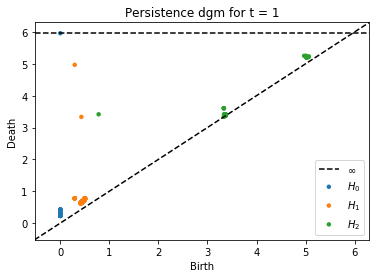

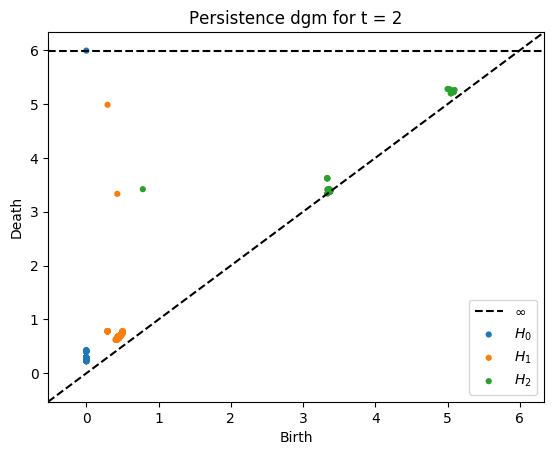

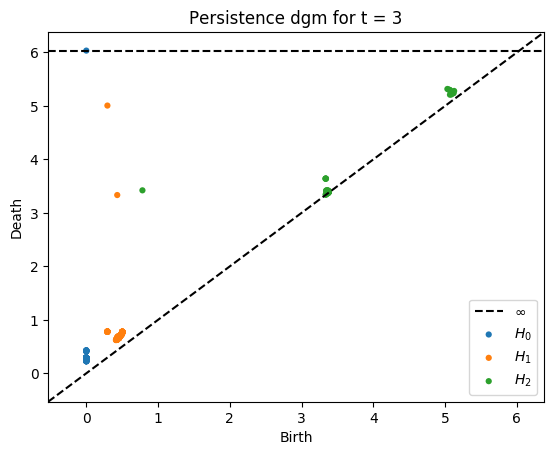

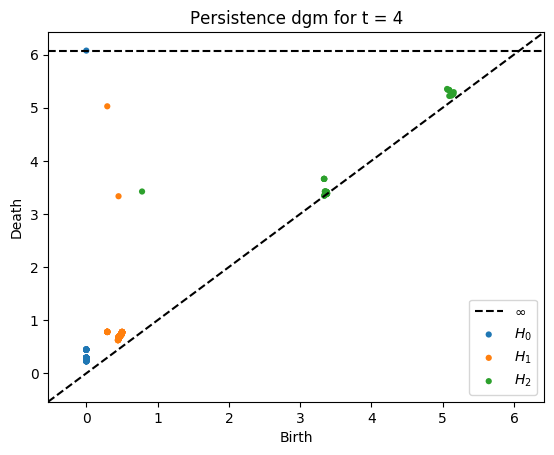

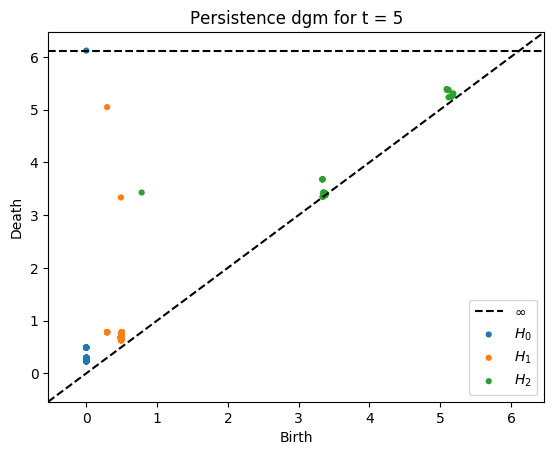

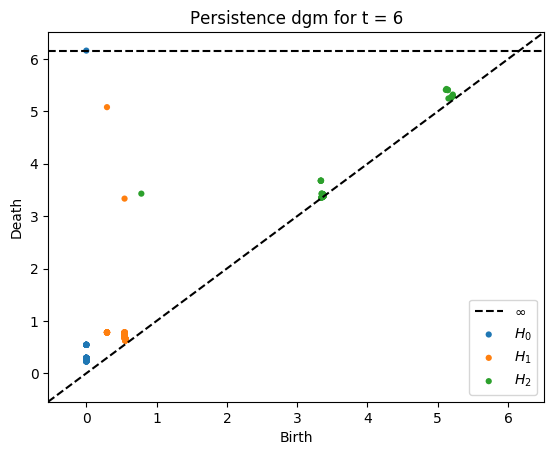

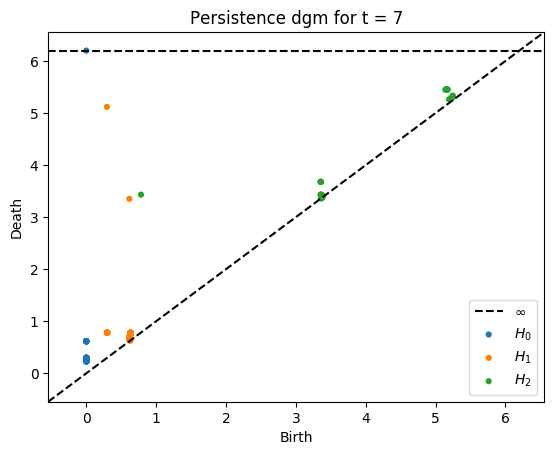

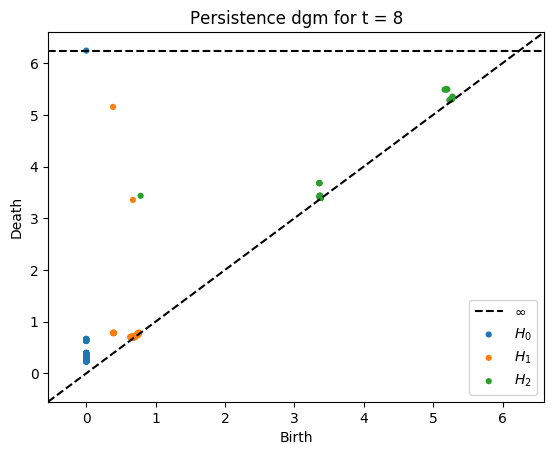

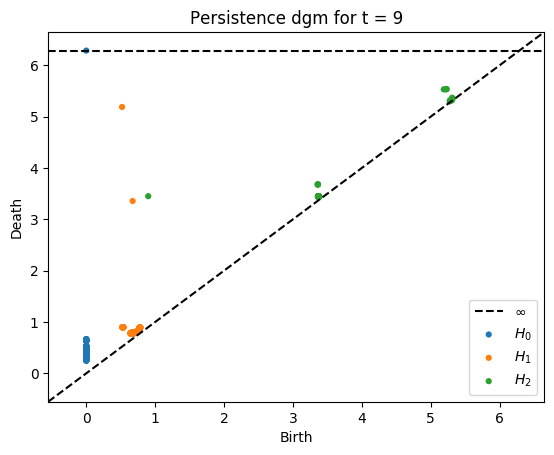

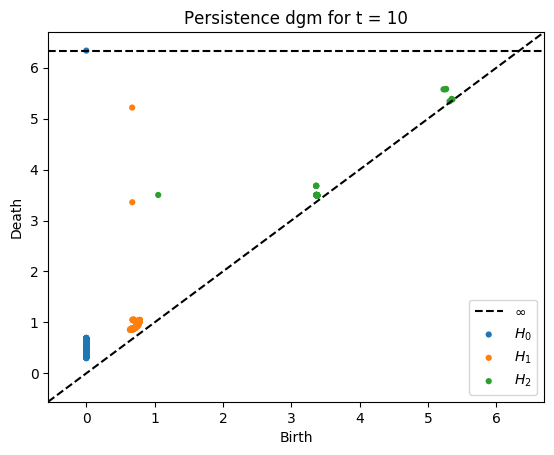

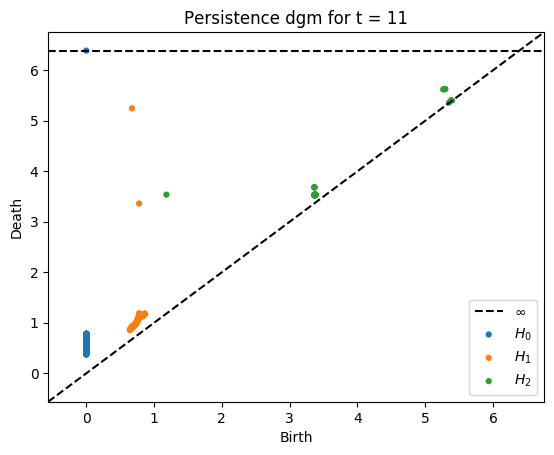

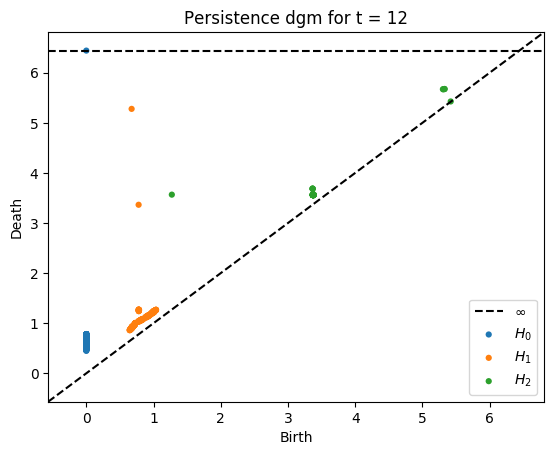

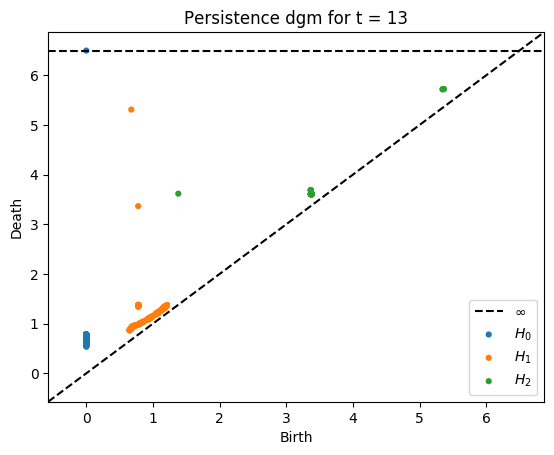

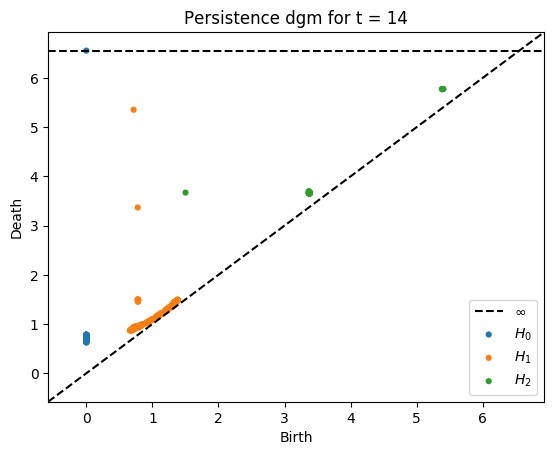

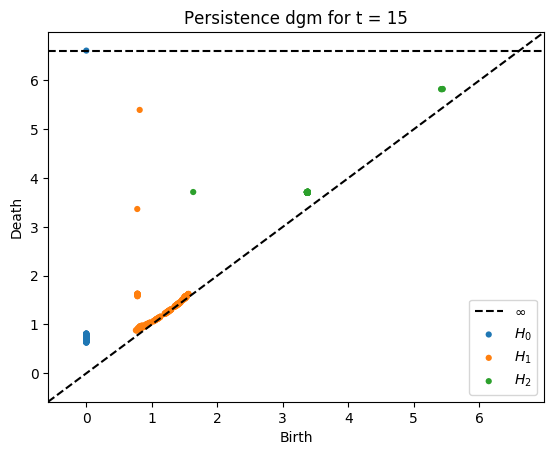

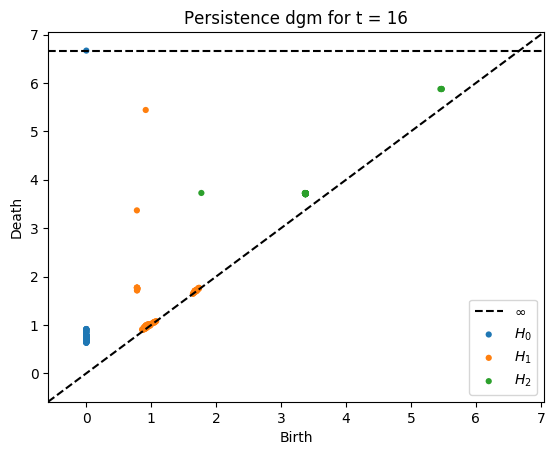

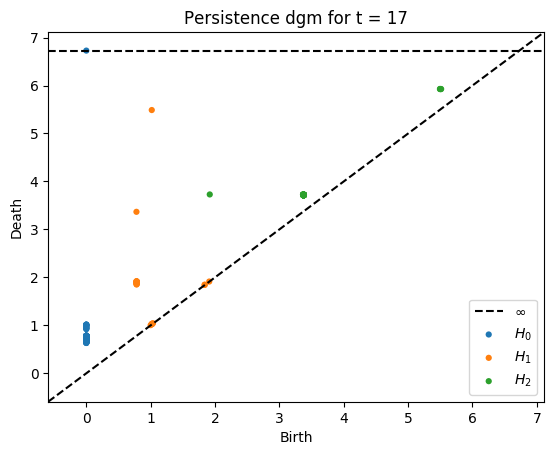

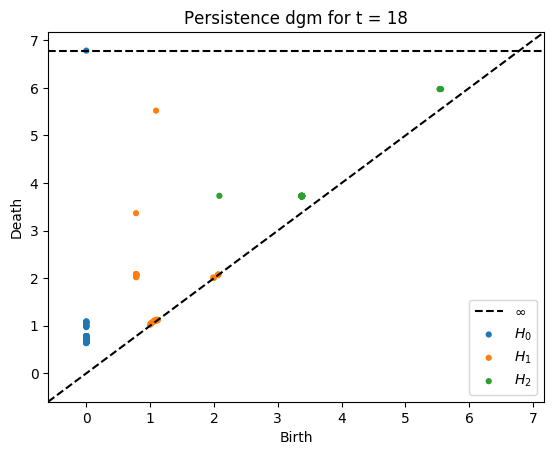

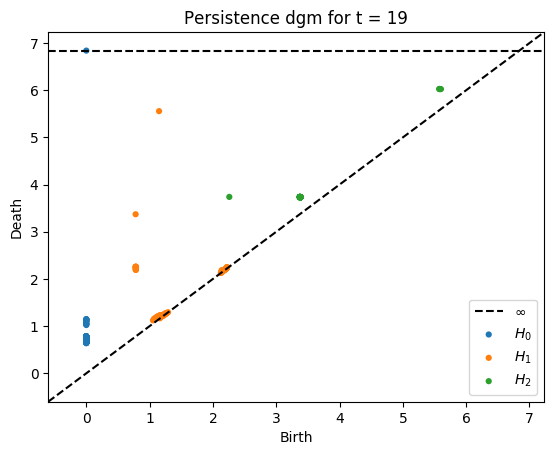

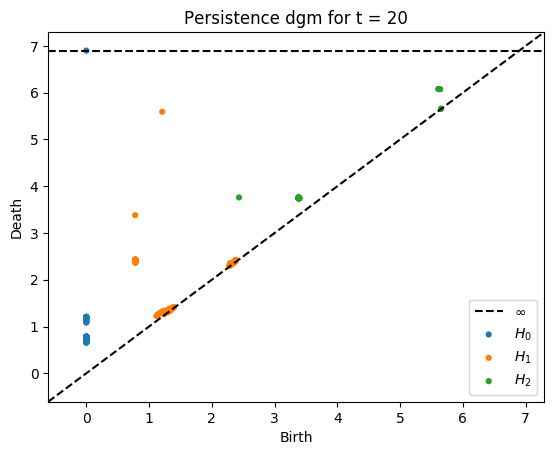

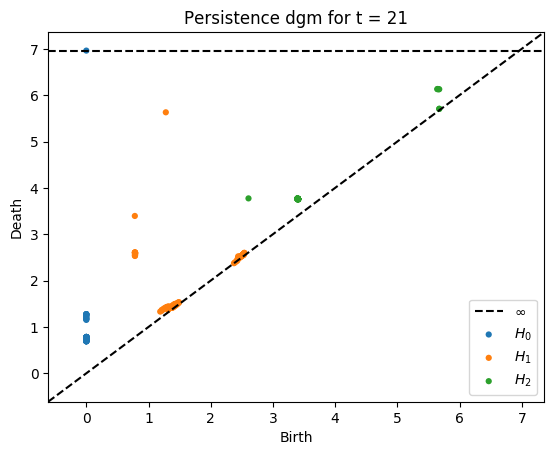

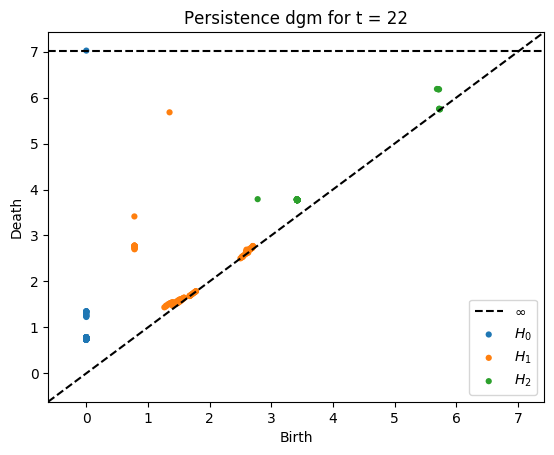

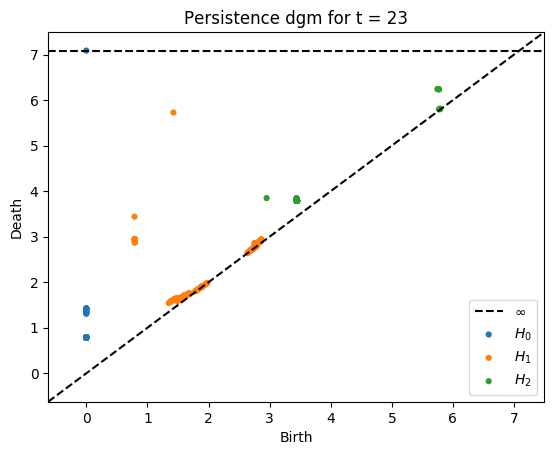

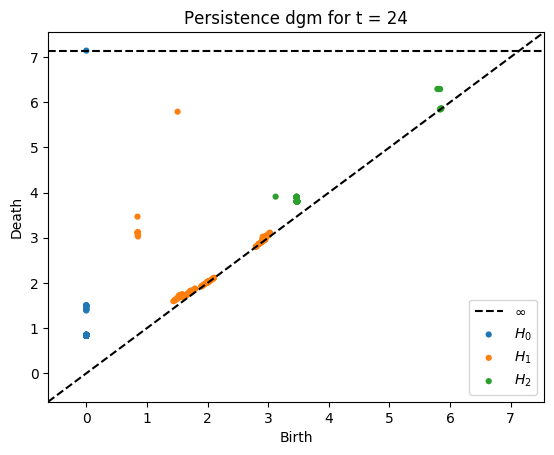

In [6]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

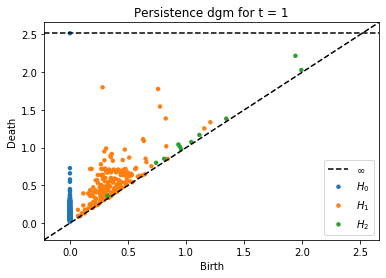

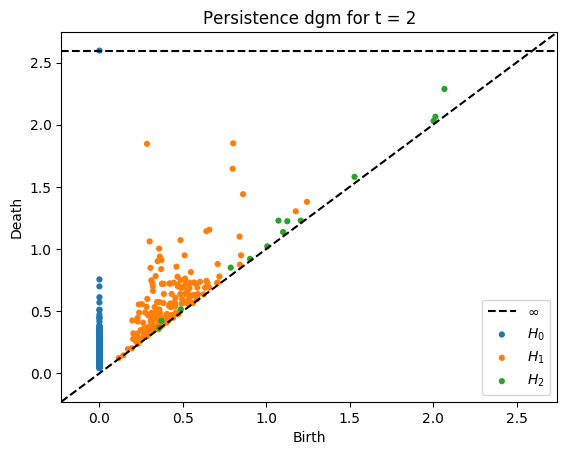

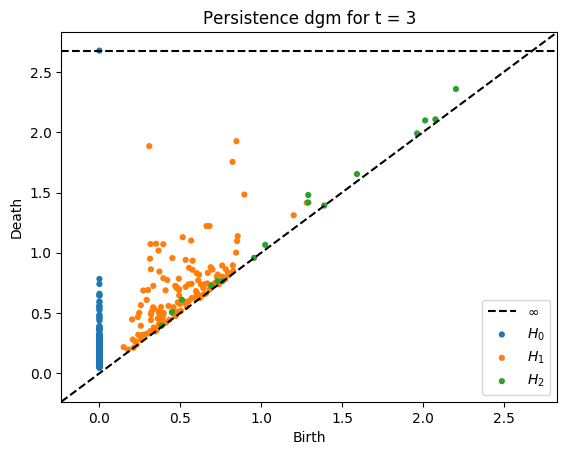

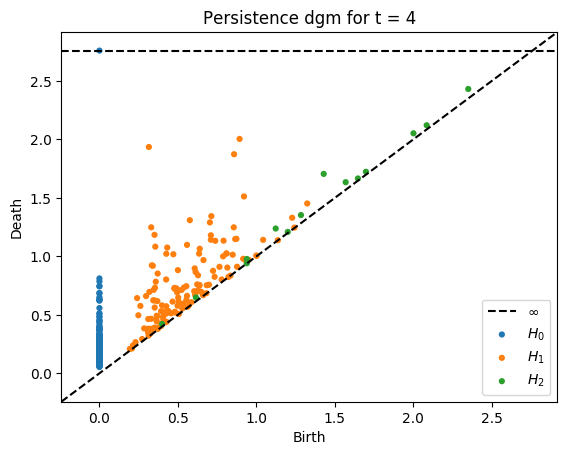

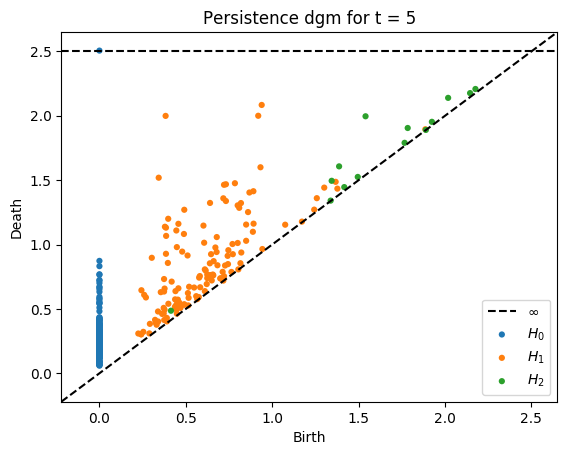

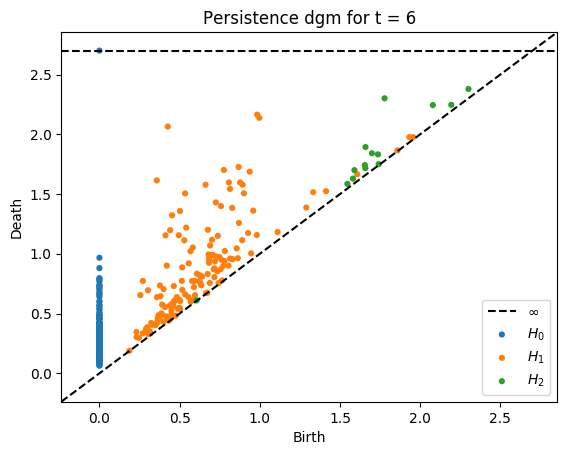

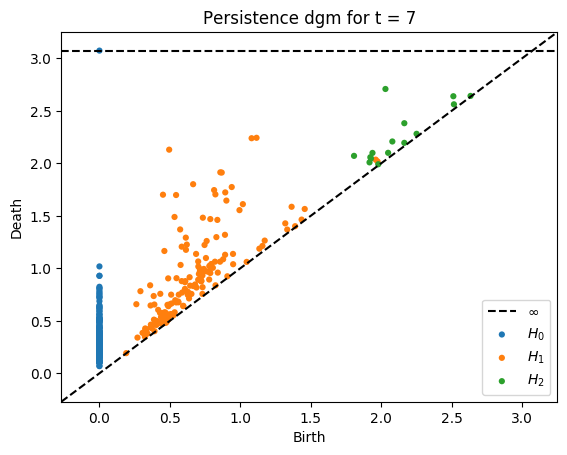

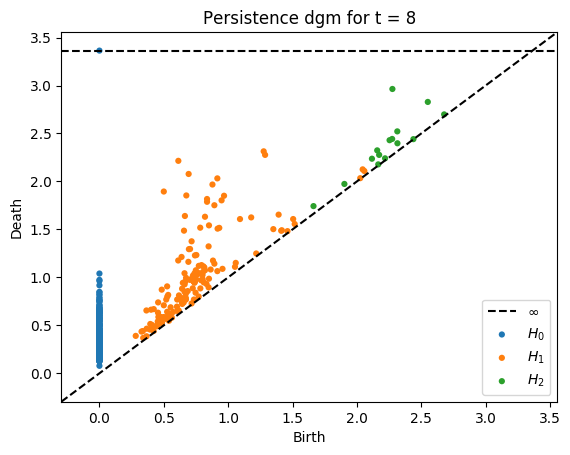

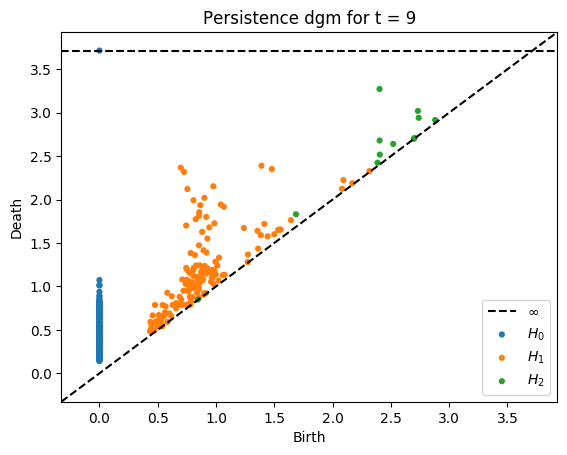

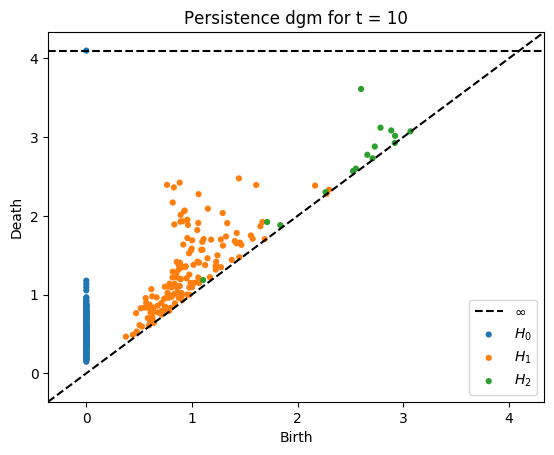

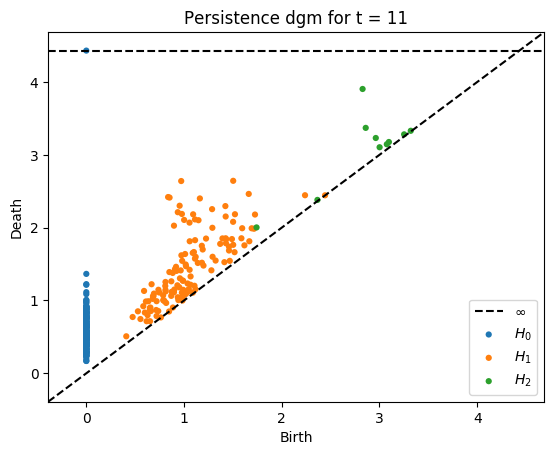

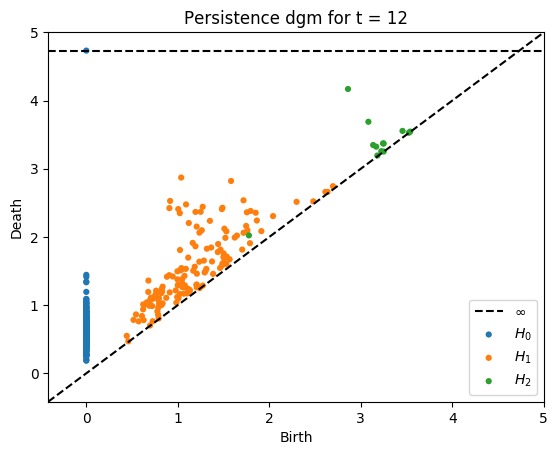

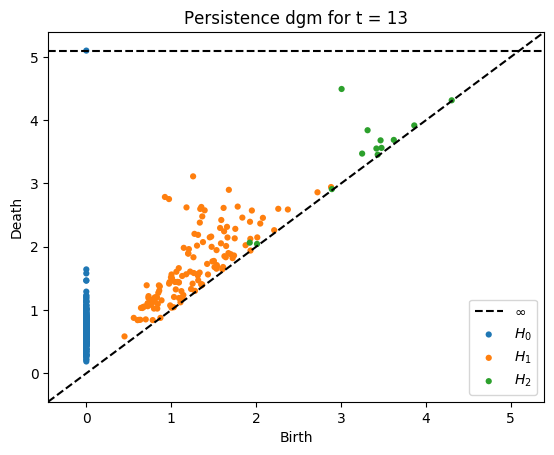

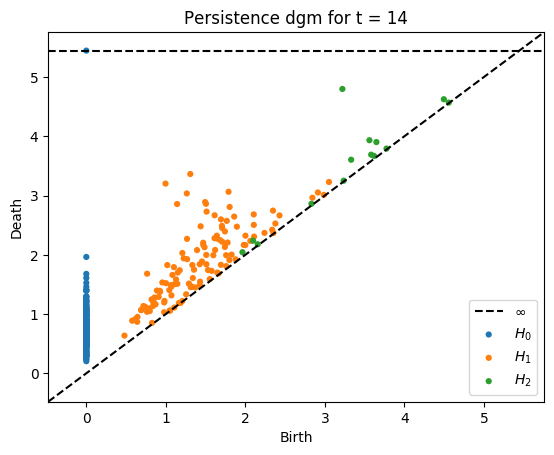

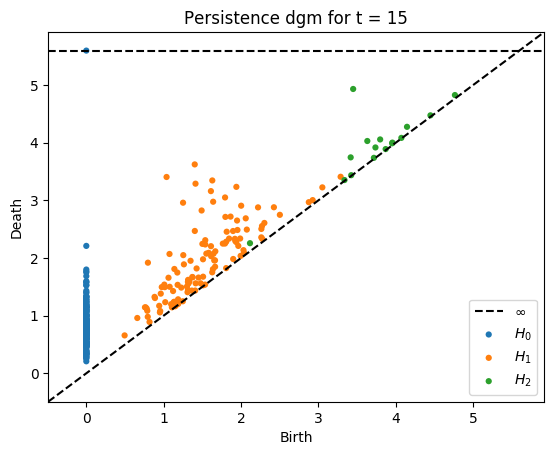

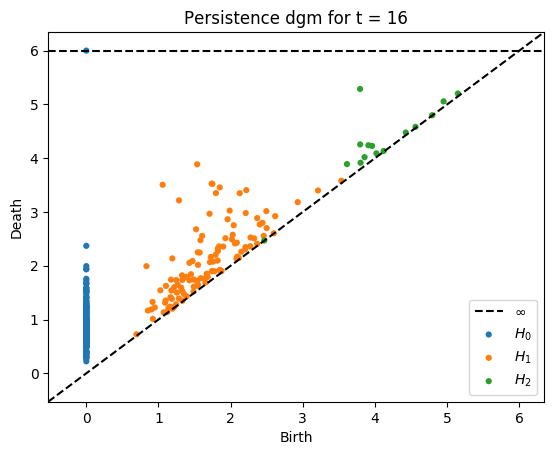

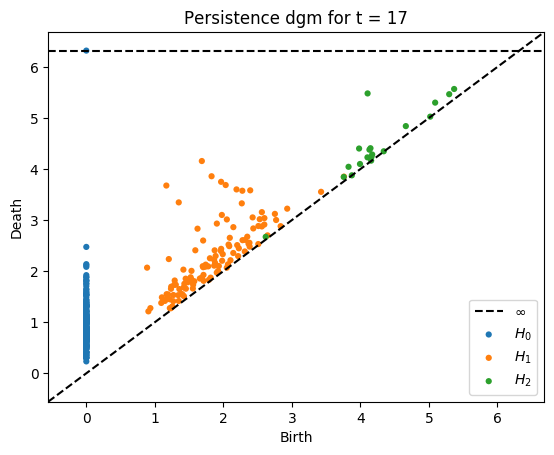

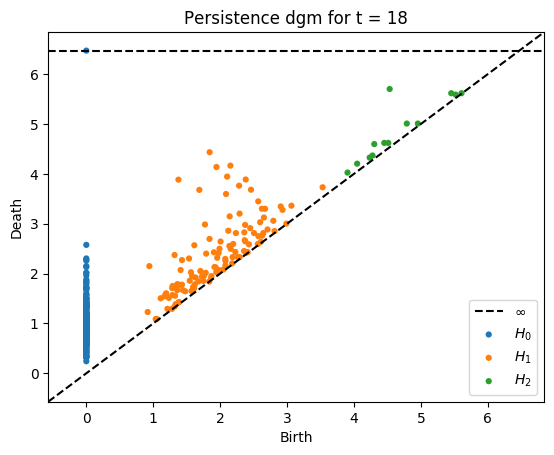

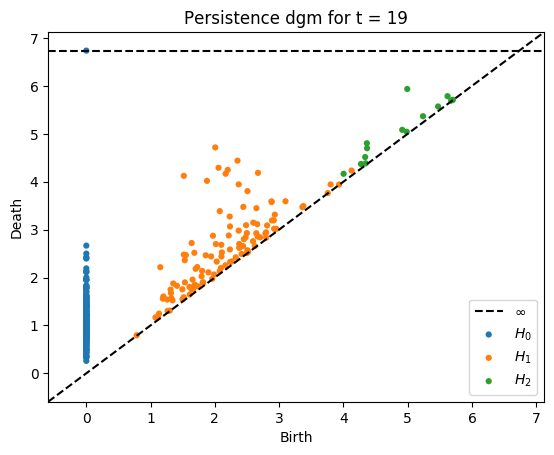

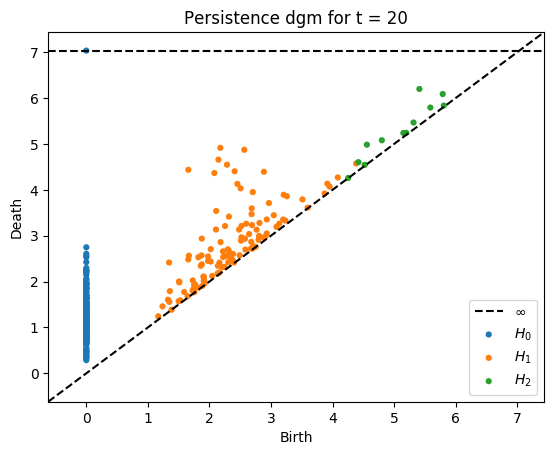

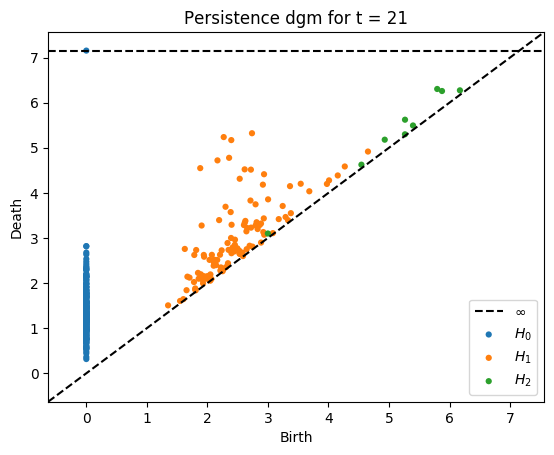

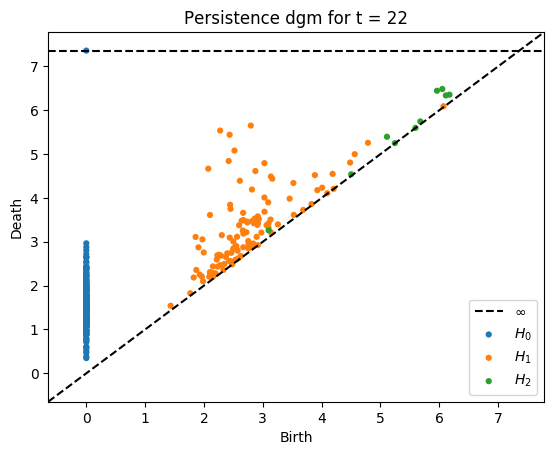

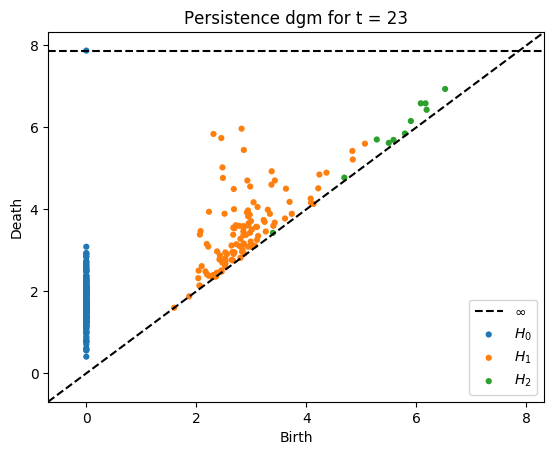

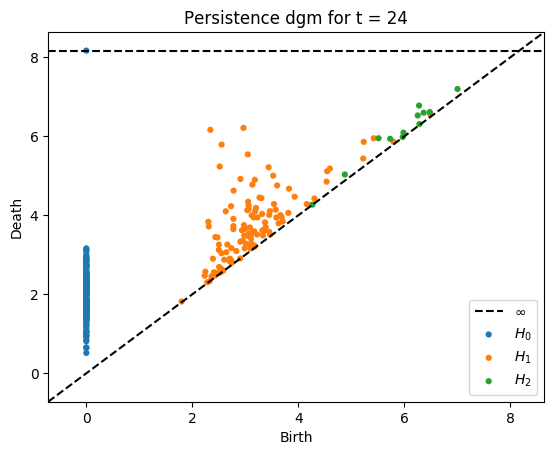

In [12]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)